<a href="https://colab.research.google.com/github/faridelya/Pandas-Seaborn-Numpy/blob/main/A14_T_Test_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Two-sample t-test?
- The two-sample t-test (also known as the independent samples t-test) is a method used to test whether the unknown population means of two groups are equal or not.

### **Question 1. State the T-Test null hypothesis for this specific research question**

**Answer:**
- H0: µ1 = µ2 (the two population means are equal)


- H-zero   Group 1 mean  =  Group 2 mean 

## **Question 2. State the T-Test alternative hypothesis for this specific research question**

**Answer:**
- HA: µ1 ≠µ2 (the two population means are not equal)

- H-one  Group 1 mean (not_equal) Group 2 mean 

## **Question 3. Explain how the degrees of freedom are determined for a 2-Sample T-Test?**

The formula for degrees of freedom depends on the type of statistical test you're performing. Below, you'll see equations for the most popular ones:

###**1-sample t-test:**
- **df = N - 1**,

- where:

- **df** - Degrees of freedom; and

- **N**- Total number of subjects/values.

### **2-sample t-test (samples with equal variances)**:
- **df = N_1 + N_2 -2**

where:

- **N₁** - Number of values from the first sample; and

- **N₂** - Number of values from the second sample.

### **2-sample t-test with unequal variances (Welch’s t-test):**
In this case, we calculate an approximation of the degrees of freedom:

- 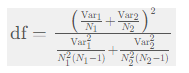

- where Var - Variance.

## **Question 4. What is the difference between a 2-Sample T-Test and a Paired T-Test?**

We can Answer this Question by Explaining the below fig.
- The assumptions that you have to analyze when deciding the kind of test you have to implement are:

- **Paired or unpaired:** The data of both groups come from the same participants or not.
- **Parametric or non-parametric:** The data are distributed according to some distributions or not.
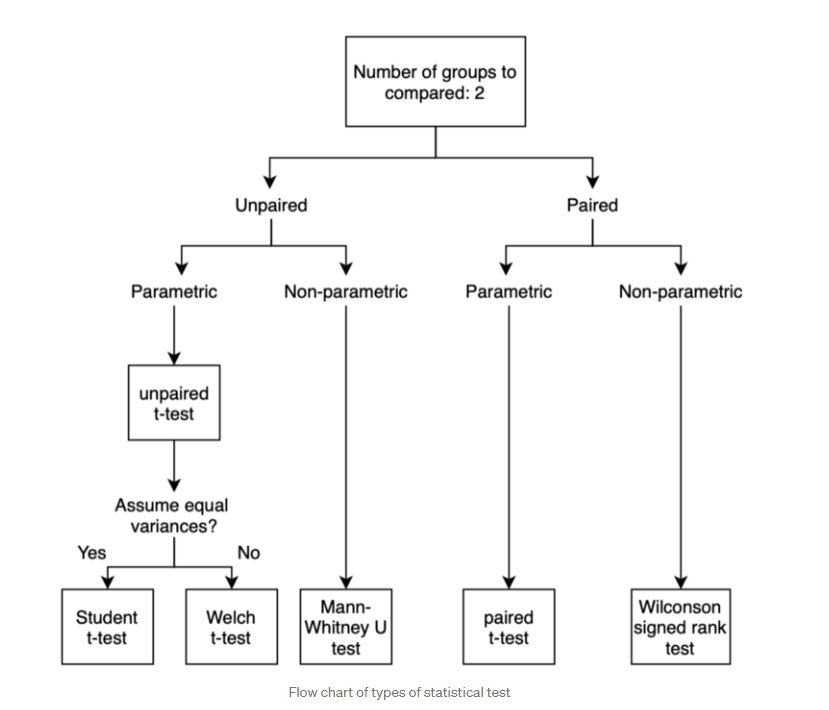


When we test **two groups or two sample**  t-test then we check for assumptions and then we decide which **t-test** should we take. **Paired and unpaired t test** 
- Paired t-test : The data of both groups come from the same participants we use paired t-test otherwise we use Unpaired t-test

## **Question 5. Explain the difference in calculating the T-Value when the two groups are assumed to have the same variance in comparison to when they are assumed to have a different variance**

## **Equal Variance or Pooled T-Test**
The equal variance t-test is an independent t-test and is used when the number of samples in each group is the same, or the variance of the two data sets is similar.

The formula used for calculating t-value and degrees of freedom for equal variance t-test is:


\begin{aligned}&\text{T-value} = \frac{ mean1 - mean2 }{\frac {(n1 - 1) \times var1^2 + (n2 - 1) \times var2^2 }{ n1 +n2 - 2}\times \sqrt{ \frac{1}{n1} + \frac{1}{n2}} } \\&\textbf{where:}\\&mean1 \text{ and } mean2 = \text{Average values of each} \\&\text{of the sample sets}\\&var1 \text{ and } var2 = \text{Variance of each of the sample sets}\\&n1 \text{ and } n2 = \text{Number of records in each sample set} \end{aligned} 
​
  

 

 

                  and,

\begin{aligned} &\text{Degrees of Freedom} = n1 + n2 - 2 \\ &\textbf{where:}\\ &n1 \text{ and } n2 = \text{Number of records in each sample set} \\ \end{aligned} 
​
  
 

## **Unequal Variance T-Test**
The unequal variance t-test is an independent t-test and is used when the number of samples in each group is different, and the variance of the two data sets is also different. This test is also called Welch's t-test.

The formula used for calculating t-value and degrees of freedom for an unequal variance t-test is:

\begin{aligned}&\text{T-value}=\frac{mean1-mean2}{\sqrt{\bigg(\frac{var1}{n1}{+\frac{var2}{n2}\bigg)}}}\\&\textbf{where:}\\&mean1 \text{ and } mean2 = \text{Average values of each} \\&\text{of the sample sets} \\&var1 \text{ and } var2 = \text{Variance of each of the sample sets} \\&n1 \text{ and } n2 = \text{Number of records in each sample set} \end{aligned} 
​
  


​
 

                and,

\begin{aligned} &\text{Degrees of Freedom} = \frac{ \left ( \frac{ var1^2 }{ n1 } + \frac{ var2^2 }{ n2 } \right )^2 }{ \frac{ \left ( \frac{ var1^2 }{ n1 } \right )^2 }{ n1 - 1 } + \frac{ \left ( \frac{ var2^2 }{ n2 } \right )^2 }{ n2 - 1}} \\ &\textbf{where:}\\ &var1 \text{ and } var2 = \text{Variance of each of the sample sets} \\ &n1 \text{ and } n2 = \text{Number of records in each sample set} \\ \end{aligned} 
​
  

 

​


In [ ]:
import pandas as pd 
import numpy as np
import scipy as sc
from scipy.stats import ttest_ind
from scipy.special import stdtr
import seaborn as sns
import matplotlib.pyplot as plt




## **Task 1. Read in the data table.**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/mos_data/us_county_ttest.csv")
df.head(4)

,Unnamed: 0,NAME,STATE_NAME,STATE_ABBR,STATE_FIPS,COUNTY_FIP,FIPS,POPULATION,POP_SQMI,SQMI,...,per_for,per_dev,per_wet,per_crop,per_past_grass,strm_length,strm_den,per_karst,rail_den,road_den
0,1,Franklin County,New York,NY,36,33,36033,47555,28.0,1695.96,...,66.907978,3.492550,15.622229,2.512130,6.397975,30.122378,0.006858,12.941445,0.063075,1.122394
1,2,Livingston County,New York,NY,36,51,36051,61834,96.6,640.26,...,34.584413,8.055299,4.185600,37.486085,13.170933,63.339277,0.038196,7.617896,0.229102,2.208785
2,3,Clearfield County,Pennsylvania,PA,42,33,42033,80562,69.8,1154.57,...,75.982068,7.619079,0.813272,0.872184,11.969102,87.374905,0.029219,0.000000,0.256697,3.182706
3,4,Fulton County,New York,NY,36,35,36035,53324,100.1,532.88,...,63.078727,6.383301,12.552822,1.063894,9.503514,14.470551,0.010485,14.057971,0.011693,1.341258


## **Task 2. Create a grouped boxplot that shows the distribution of mean annual temperature within the two groups.**

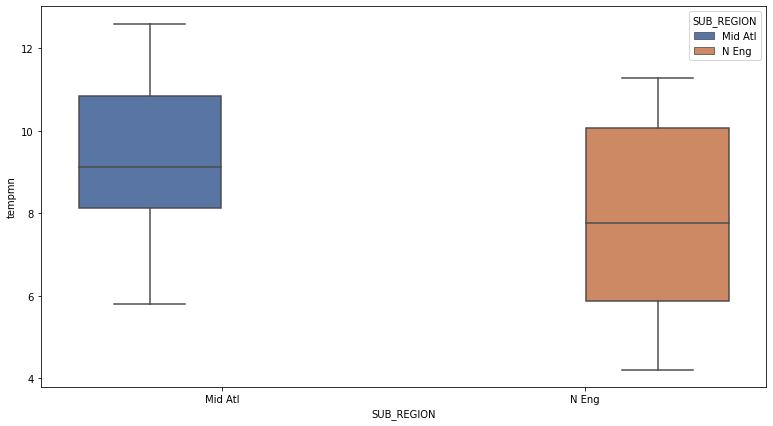

In [ ]:
two =df[df['SUB_REGION'].isin(['Mid Atl','N Eng'])]
plt.subplots(figsize=(13,7))
sns.boxplot(data=two, y="tempmn",x='SUB_REGION', hue="SUB_REGION",  palette='deep');




## **Task 3. Generate a function that calculates and returns the T-Value, p-value, degrees of freedom, Group 1 mean, and Group 2 mean. The calculations should assume that the groups do not have equal variance and that the test is two-sided. You cannot use a function that performs a T-Test directly (e.g., t.test() in R). Instead, you must perform the required calculations in code. You can use a function that calculates a p-value if provided the T-Value and the degrees of freedom. This is too difficult to code on your own.**

t-test assumptions
-  The data in each sample are normally distributed.
-  The data in each sample have approximately equal variances. The t-test is fairly robust with regard to
this assumption, but if there is a large difference between the variances in each population then you can
also do a t-test that assumes unequal variance.

In [ ]:
import pandas as pd 
import numpy as np
import scipy as sc
from scipy.stats import ttest_ind
from scipy.special import stdtr

def two_paired_ttest(a=None ,b=None, t_value=None, dof=None, equal_var=False ):
  """
  Parameters:
  a = Group 1
  b = Group 2
  t_vale: if some one want to find p value base on t_value (int or float) and dof value they can use these parameter
  dof:  Degree of fredom value (int)
  equal_var; by default this is False you can change to true
  """
  np.random.seed(1)
  if a is not None and b is not None:
    abar = a.mean()
    avar = a.var(ddof=1)
    na = a.size
    adof = na - 1

    bbar = b.mean()
    bvar = b.var(ddof=1)
    nb = b.size
    bdof = nb - 1
  
  if t_value !=None and dof !=None:
    pf = 2*stdtr(dof, -np.abs(t_value))
    print("P_value", round( pf,3))
  else:
    tf = (abar - bbar) / np.sqrt(avar/na + bvar/nb)
    if equal_var ==False:
      
      dof = (avar/na + bvar/nb)**2 / (avar**2/(na**2*adof) + bvar**2/(nb**2*bdof)) #this is for unequal variance
      pf = 2*stdtr(dof, -np.abs(tf))
      print("Result for Unequal variance : t_value = %g  p_value = %g dof = %g Group1 mean = %g  Group2 mean = %g " % (tf, pf,dof,abar, bbar ))
    else:
      # h = ((na-1)*avar**2+(nb-1)*bvar**2)/na+nb-2
      # tf = (abar-bbar)/np.sqrt(h*1/na+1/nb) # this is for equal variance
      dof = na + nb -2
      pf = 2*stdtr(dof, -np.abs(tf))
      print("Result for Equal variance: t_value = %g  p_value = %g dof = %g Group1 mean = %g  Group2 mean = %g " % (tf, pf,dof,abar, bbar ))



## Scipy t test function 

In [ ]:
# Use scipy.stats.ttest_ind_from_stats.
def build_in_ttest(a,b, equal_var=True):
  # Use scipy.stats.ttest_ind.
  
  t, p = ttest_ind(a, b, equal_var=equal_var)
  print("Scipy buildin Function:\n")

  print("ttest_ind  equal_var is ",equal_var,":            t = %g  p = %g" % (t, p))
  print("\n---------------------------------------------------------------------------")


## provided the T-Value and the degrees of freedom

In [ ]:
two_paired_ttest( t_value =-0.633,dof= 36.141)

P_value 0.531


## Call to Compare scipy and my function result

##### **check for same size group  wih equal anad un equal parameter**

In [ ]:
# prepare data of 2 groups
a = np.array([14, 15, 15, 16, 13, 8, 14, 17, 16, 14, 19, 20, 21, 15, 15, 16, 16, 13, 14, 12])
b = np.array([15, 17, 14, 17, 14, 8, 12, 19, 19, 14, 17, 22, 24, 16, 13, 16, 13, 18, 15, 13])



# call to scipy funtion
build_in_ttest(a,b, equal_var=True )

print("\n------- below are my function result----------\n")

#call to my function
two_paired_ttest(a , b, equal_var=True) 


print("\n=======================  unequal variance==================\n")

# call to scipy funtion
build_in_ttest(a,b, equal_var=False )

print("\n------- below are my function result----------\n")

#call to my function
two_paired_ttest(a , b, equal_var=False) 

Scipy buildin Function:

ttest_ind  equal_var is  True :            t = -0.63374  p = 0.530047

---------------------------------------------------------------------------

------- below are my function result----------

Result for Equal variance: t_value = -0.63374  p_value = 0.530047 dof = 38 Group1 mean = 15.15  Group2 mean = 15.8 

=======================  unequal variance==================

Scipy buildin Function:

ttest_ind  equal_var is  False :            t = -0.63374  p = 0.530241

---------------------------------------------------------------------------

------- below are my function result----------

Result for Unequal variance : t_value = -0.63374  p_value = 0.530241 dof = 36.1415 Group1 mean = 15.15  Group2 mean = 15.8 


##### **CHeck for different size group with equal and unequal variance prameter** 

In [ ]:
a = np.random.randn(40)
b = 4*np.random.randn(50)

print("=================== Unequal variance =========================\n")


# call to scipy funtion
build_in_ttest(a,b, equal_var=False )
print("\n------- below are my function result----------\n")
#call to my function
two_paired_ttest(a , b, equal_var=False)

print("\n\n=================== Equal variance =========================\n")

# call to scipy funtion
build_in_ttest(a,b, equal_var=True )
print("\n------- below are my function result----------\n")
#call to my function
two_paired_ttest(a , b, equal_var=True)

=================== Unequal variance =========================

Scipy buildin Function:

ttest_ind  equal_var is  False :            t = -1.5827  p = 0.118873

---------------------------------------------------------------------------

------- below are my function result----------

Result for Unequal variance : t_value = -1.5827  p_value = 0.118873 dof = 58.5971 Group1 mean = -0.089598  Group2 mean = 0.719483 


=================== Equal variance =========================

Scipy buildin Function:

ttest_ind  equal_var is  True :            t = -1.43805  p = 0.153967

---------------------------------------------------------------------------

------- below are my function result----------

Result for Equal variance: t_value = -1.5827  p_value = 0.117078 dof = 88 Group1 mean = -0.089598  Group2 mean = 0.719483 


## **Question 6. Based on the grouped boxplot, what do you expect to be the results of the TTest? Explain your reasoning.**

In [ ]:
two =df[df['SUB_REGION'].isin(['Mid Atl','N Eng'])]
md_atl = df[df['SUB_REGION'] =='Mid Atl']
n_eng = df[df['SUB_REGION'] == 'N Eng']

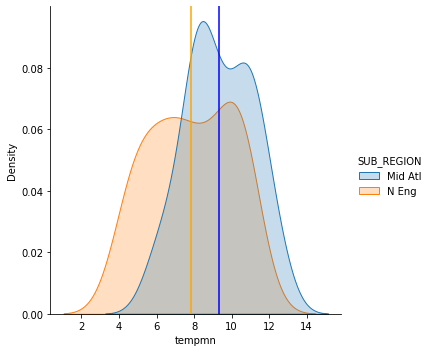

In [ ]:
# just checking the distribution of two group
sns.displot(two, x="tempmn", hue="SUB_REGION", kind="kde", fill=True)
plt.axvline(x=md_atl.tempmn.mean(),
            color='blue');
plt.axvline(x=n_eng.tempmn.mean(),
color='orange');


## **Checking For Variance before Two sample t test**

In [ ]:
print("mid_atlantic variance ===>",md_atl['tempmn'].var().round(2))
print("N eng variance ===>",n_eng['tempmn'].var().round(2))

print("\n---with numpy---")
print(np.var(md_atl['tempmn']).round(2) , np.var(n_eng['tempmn']).round(2))

mid_atlantic variance ===> 3.14
N eng variance ===> 4.88

---with numpy---
3.06 4.76


The ratio of the larger sample variance to the smaller sample variance would be calculated as:

Ratio = 4.88 / 3.14 = 1.55

Since this ratio is less than 4, we could assume that the variances between the two groups are approximately equal.

In [ ]:
# we will call to my funtion with the data that boxplot has and check the ttest
# whether the null hypothesis is rejected or not 

print("\n -----Below is the reslt of my functin---------\n")

two_paired_ttest(a = md_atl['tempmn'], b=n_eng['tempmn'] ,equal_var=True )

print("\n -----Below is the result of scipy functin---------\n")

build_in_ttest(a =md_atl['tempmn'] ,b= n_eng['tempmn'] , equal_var=True )


 -----Below is the reslt of my functin---------

Result for Equal variance: t_value = 3.35569  p_value = 0.00122518 dof = 78 Group1 mean = 9.34843  Group2 mean = 7.84627 

 -----Below is the result of scipy functin---------

Scipy buildin Function:

ttest_ind  equal_var is  True :            t = 3.35569  p = 0.00122518

---------------------------------------------------------------------------


p value 0.00122518< 0.05 (aplha) so null hypothesis is rejcted mean the population mean of two group are different

## Question 7. State the findings of the T-Test using standard statistical language.